## Description:

#### Human Activity Recognition database was built from the recordings of 30 study participants performing activities of dialy living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors.The objective is to classify activities into one of the six activities oerformed. Activities: 

- Walking
- Upstairs
- Downstairs
- Sitting
- Standing


## 1. Importing Libraries:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## 2. Loading Data:

In [2]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train.shape

(7352, 563)

In [6]:
test.shape

(999, 563)

In [7]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

## 3. Data processing

### 3.a Checking Duplicates: 

In [8]:
print("Nuber of Duplicates in training data:",sum(train.duplicated()))
print("Nuber of Duplicates in testing data:",sum(test.duplicated()))

Nuber of Duplicates in training data: 0
Nuber of Duplicates in testing data: 0


### 3.b Checking Null Values:

In [9]:
print("number of null values in training data:", train.isnull().values.sum())
print("number of null values in testing data:", train.isna().values.sum())

number of null values in training data: 0
number of null values in testing data: 0


### 3.c Checking for class imbalance:

<font color = 'teal'>Here we are predicting for 6 activities. We need to make sure that each class has enough data instances for each class. So that model can be dwelled down well or there shouldn't be any bias</font>

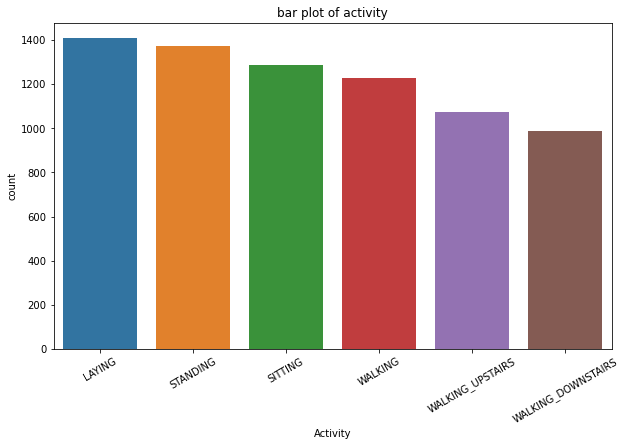

In [10]:
plt.figure(figsize = (10,6))
plt.title("bar plot of activity")
sns.countplot(train.Activity, order = train.Activity.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

<font color = 'teal'>There almost same number of observations across all the activities. So there is no imbalance</font>

## 4. Exploratory Data Analysis:

In [11]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [12]:
sample_str = 'tBodyAcc-std()-X'
sample_str1 = 'angle(tBodyAccMean,gravity)'
print((sample_str.split("-")[0]).split("(")[0])
print((sample_str1.split("-")[0]).split("(")[0])

tBodyAcc
angle


In [13]:
[col.split('-')[0].split('(')[0] for col in train.columns]

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [14]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [15]:
d = pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient='index')
d.rename(columns = {0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


### 4.a Analysing tBodyAccMag-Mean feature:

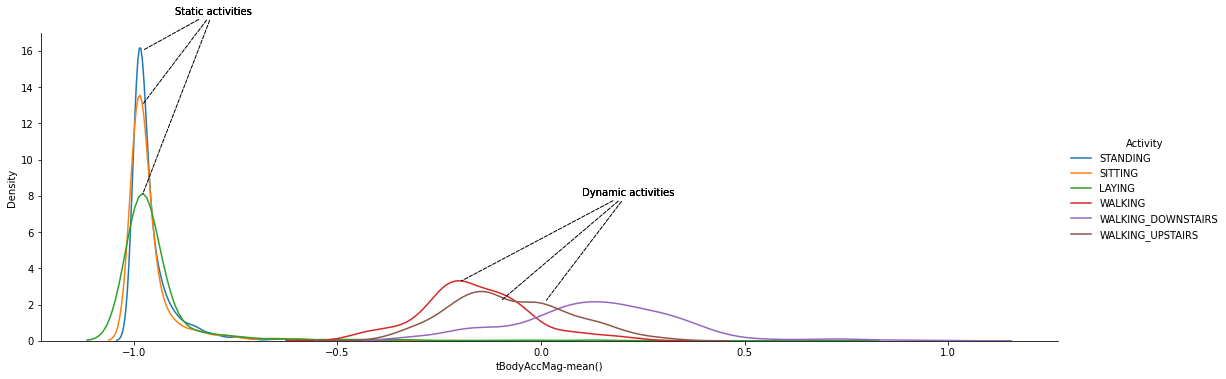

In [16]:
facetgrid=sns.FacetGrid(train, hue = "Activity", height = 5,aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist=False).add_legend()


plt.annotate('Static activities', xy=(-0.98, 8), xytext = (-0.9, 18), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static activities', xy=(-0.98, 13), xytext = (-0.9, 18), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Static activities', xy=(-0.98, 16), xytext = (-0.9, 18), arrowprops={'arrowstyle':'-', 'ls':'dashed'})

plt.annotate('Dynamic activities', xy=(-0.2, 3.25), xytext = (0.1, 8), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic activities', xy=(-0.1, 2.18), xytext = (0.1, 8), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.annotate('Dynamic activities', xy=(0.01, 2.15), xytext = (0.1, 8), arrowprops={'arrowstyle':'-', 'ls':'dashed'})
plt.show()

<font color = 'teal'>for static activities acc is around -1</font>

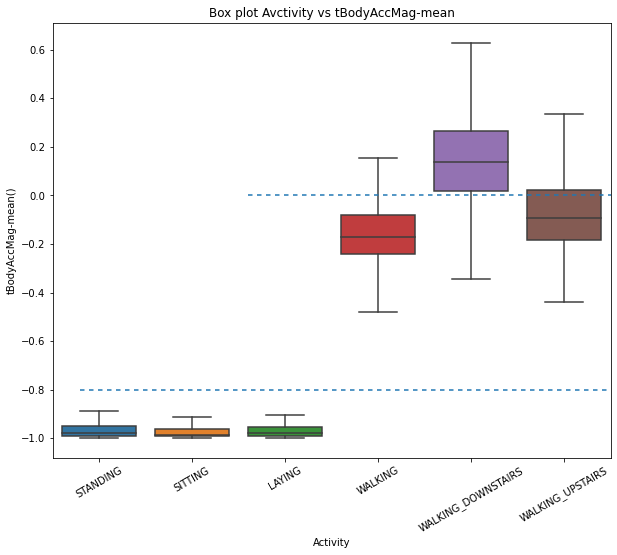

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot("Activity", 'tBodyAccMag-mean()', data= train, showfliers= False)
plt.title("Box plot Avctivity vs tBodyAccMag-mean")
plt.xlabel("Activity")
plt.ylabel("tBodyAccMag-mean()")
plt.xticks(rotation=30)

plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y = 0.0, xmin = 0.35, dashes = (3,3))
plt.show()

### 4.b Analysing angle between x axis and gravity mean feature

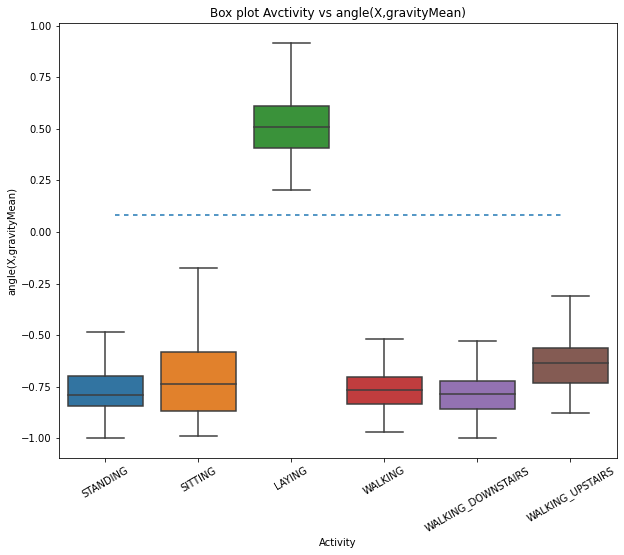

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot("Activity", 'angle(X,gravityMean)', data= train, showfliers= False)
plt.title("Box plot Avctivity vs angle(X,gravityMean)")
plt.xlabel("Activity")
plt.ylabel("angle(X,gravityMean)")
plt.xticks(rotation=30)


plt.axhline(y = 0.08, xmin = 0.1,xmax =0.9, dashes = (3,3))
plt.show()

#### <font color='teal'>While laying body (back) will be perpendicular to gravity axis while for other activities it will be along the gravity axis</font>

### 4.c Analysing Angle between y axis and gravity mean feature:

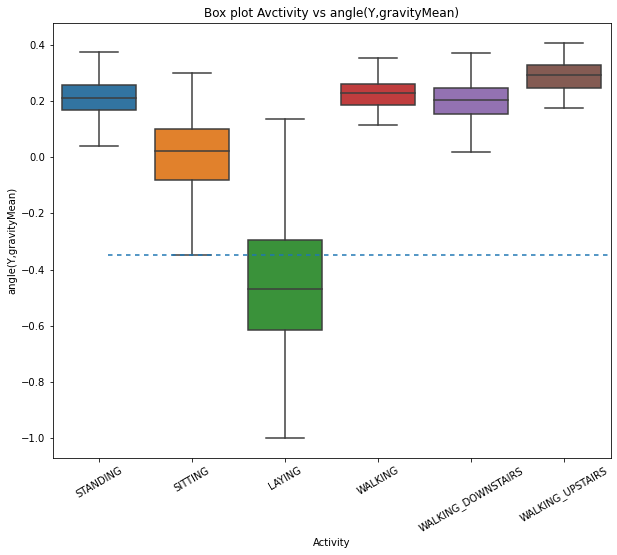

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot("Activity", 'angle(Y,gravityMean)', data= train, showfliers= False)
plt.title("Box plot Avctivity vs angle(Y,gravityMean)")
plt.xlabel("Activity")
plt.ylabel("angle(Y,gravityMean)")
plt.xticks(rotation=30)


plt.axhline(y = -0.35, xmin = 0.1, dashes = (3,3))
plt.show()

#### <font color='teal'>Here just opposite as above, While laying body (back) will be alongthe axis perpendicular to gravity axis(i.e., Y-axis) while for other activities it will be perpendicular to Y-axis</font>

## 4.d Visualizing Data using PCA:

Given training data has 561 features let's visualize using PCA

In [20]:
x_for_pca = train.drop(['subject', 'Activity'],axis=1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [21]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

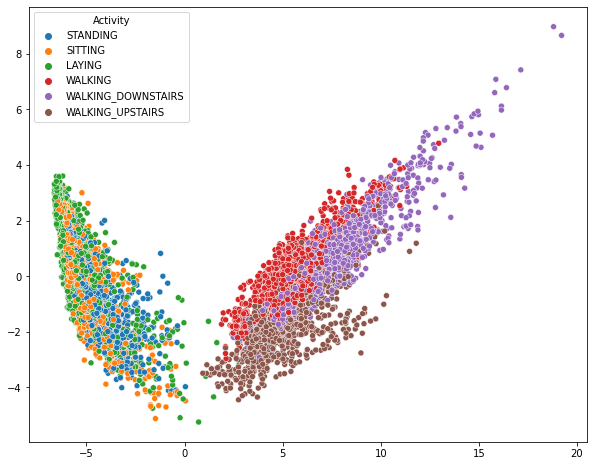

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(pca[:,0], pca[:,1], hue = train['Activity'])
plt.show()

## 4.e Visualizing data using tSNE

In [23]:
x_for_tsne = train.drop(['subject','Activity'], axis=1)
tsne= TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

In [24]:
tsne

array([[ 63.4906   , -39.7206   ],
       [ 13.5708065, -39.372986 ],
       [ 16.88333  , -37.352337 ],
       ...,
       [ 60.73749  ,  14.081628 ],
       [ 60.48153  ,  14.081899 ],
       [ 59.754375 ,  14.62647  ]], dtype=float32)

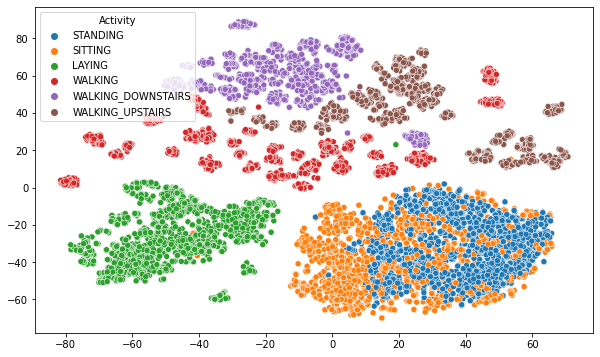

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(tsne[:,0], tsne[:, 1], hue = train['Activity'])
plt.show()

## 5. ML models:

### Training, testing data

In [26]:
x_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train.Activity

x_test = test.drop(['subject', 'Activity'], axis = 1)
y_test=test.Activity

In [27]:
print("x training data size:",x_train.shape)
print("y training data size:",y_train.shape)

print("x testing data size:",x_test.shape)
print("y testing data size:",y_test.shape)

x training data size: (7352, 561)
y training data size: (7352,)
x testing data size: (999, 561)
y testing data size: (999,)


In [28]:
x_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [29]:
y_train.head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

## 5.a Logistic Regression with Hyperparameter tuning and cross validation

In [ ]:
parameters = {'max_iter':[100, 200, 500, 700, 800,1000]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5, random_state=42) 
#cv-similar to KFold cross validation
lr_classifier_rs.fit(x_train, y_train)
print("best parameter: ",lr_classifier_rs.best_params_)
y_predict_lr = lr_classifier_rs.predict(x_test)

In [ ]:
lr_accuracy_score = accuracy_score(y_test, y_predict_lr)
print("Accuracy score of Logistic Regression:",lr_accuracy_score)

In [32]:
cm = confusion_matrix(y_test.values, y_predict_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

In [33]:
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize = (10,8))
    im = ax.imshow(cm, interpolation='nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks = np.arange(cm.shape[1]), yticks = np.arange(cm.shape[0]), xticklabels = labels, yticklabels = labels, ylabel= 'True label', xlabel = 'Predicted label')
    plt.xticks(rotation=45)
    thresh = cm.max()/2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,i, int(cm[i, j]), ha='center', va= 'center',color = 'white' if cm[i,j]>thresh else "black")
    fig.tight_layout()

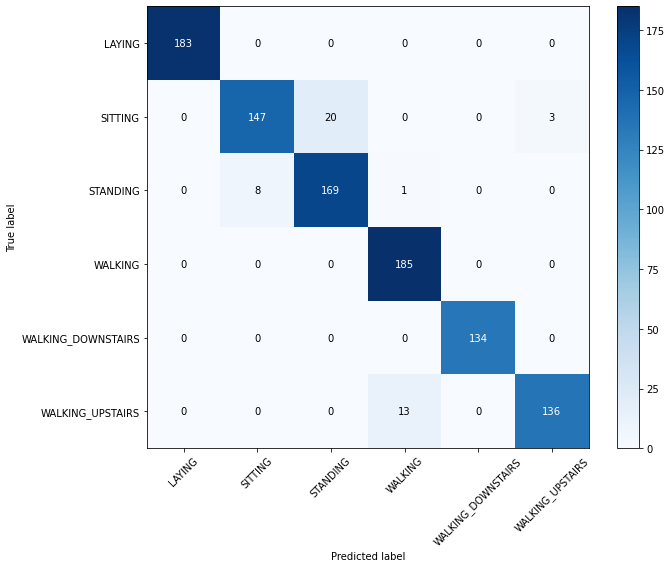

In [34]:
plot_confusion_matrix(cm, np.unique(y_predict_lr))

In [35]:
#function to get best random search attribute
def best_RandomSearchCV_results(model):
    print("Best estimator:", model.best_estimator_)
    print("Best parameter: ", model.best_params_)
    print("Best score: ", model.best_score_)

In [36]:
best_RandomSearchCV_results(lr_classifier_rs)

Best estimator: LogisticRegression(max_iter=500)
Best parameter:  {'max_iter': 500}
Best score:  0.9373033292174788


## 5.c Kernel SVM model with Hyperparameter tuning and cross validation:

In [37]:
parameters = {
    'kernel':['linear','rbf', 'poly', 'sigmoid'],
    'C' : [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, random_state=42, cv=3)
svm_rs.fit(x_train, y_train)
y_predict_svm=svm_rs.predict(x_test)

In [38]:
print('accuracy score for SVM model:', accuracy_score(y_test, y_predict_svm))

accuracy score for SVM model: 0.965965965965966


In [39]:
best_RandomSearchCV_results(svm_rs)

Best estimator: SVC(C=50)
Best parameter:  {'kernel': 'rbf', 'C': 50}
Best score:  0.9464109332023303


In [40]:
cm = confusion_matrix(y_test.values, y_predict_svm)

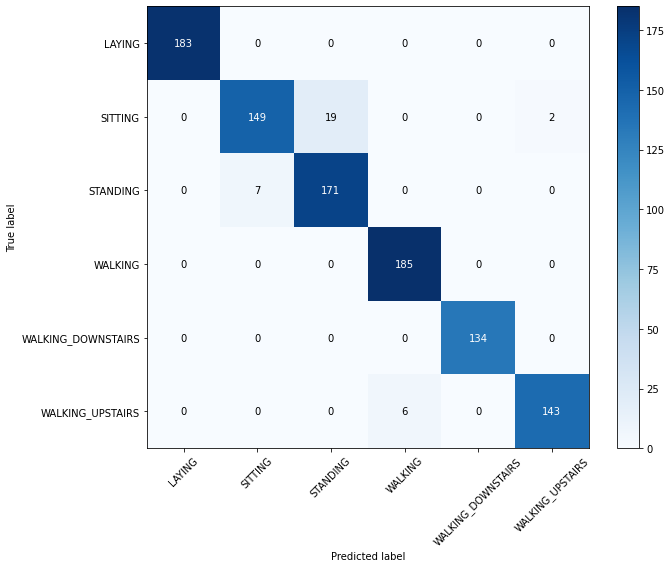

In [41]:
plot_confusion_matrix(cm, np.unique(y_test))

<AxesSubplot:>

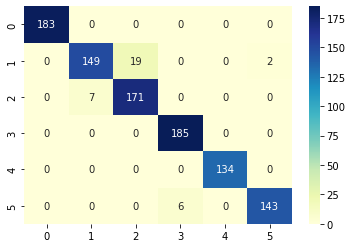

In [42]:
sns.heatmap(cm, annot=True, cmap='YlGnBu',fmt='d')

## 5.d Decision Tree model with Hyperparameter Tuning and Cross Validation:

In [43]:
parameters={
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':np.arange(2,10,2)
}

dt_classifier_rs = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=parameters,random_state=42)
dt_classifier_rs.fit(x_train, y_train)
y_predict_dt = dt_classifier_rs.predict(x_test)

In [44]:
best_RandomSearchCV_results(dt_classifier_rs)

Best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=8)
Best parameter:  {'max_depth': 8, 'criterion': 'entropy'}
Best score:  0.852970028256034


In [45]:
print("Accuracy score of Decision Tree: ", accuracy_score(y_test, y_predict_dt))

Accuracy score of Decision Tree:  0.7907907907907908


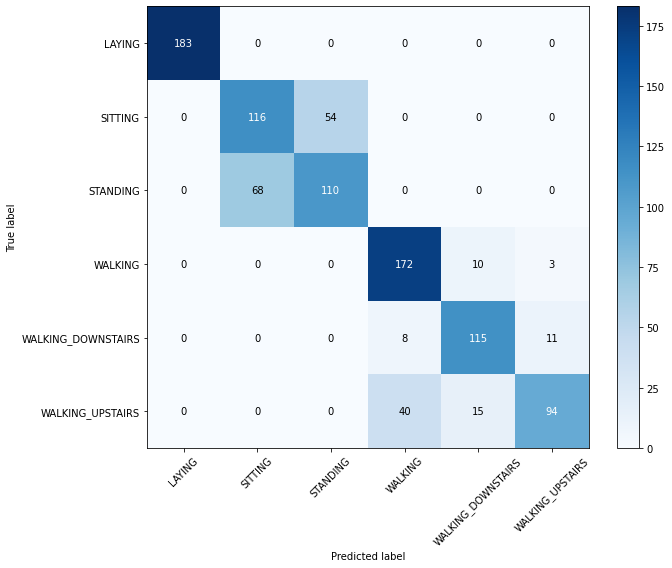

In [46]:
plot_confusion_matrix(confusion_matrix(y_test.values, y_predict_dt),np.unique(y_test))

## 5.e Random Forest model with Hyperparameter Tuning and Cross Validation:

In [ ]:
parameters = {
    'n_estimators':np.arange(20, 101, 20),
    'max_depth':np.arange(2,17,2)
}

rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters, random_state=42)
rf_classifier_rs.fit(x_train, y_train)
y_predict_rf = rf_classifier_rs.predict(x_test)

In [ ]:
best_RandomSearchCV_results(rf_classifier_rs)

In [ ]:
print("Accuracy score for Random Forest model: ", accuracy_score(y_test, y_predict_rf))

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test.values,y_predict_rf), np.unique(y_test))